<a href="https://colab.research.google.com/github/palash04/Artificial-Intelligence/blob/master/Kaggle/_Real_or_Not_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Screenshot 2020-07-25 at 09 47 51](https://user-images.githubusercontent.com/26361028/88448462-ea82ae00-ce5b-11ea-967a-8e25990759bd.png)


In [208]:
data = '/content/drive/My Drive/Artificial Intelligence/DataSet/NLP/RealOrNot'
train_data_path = data + '/train.csv'
test_data_path = data + '/test.csv'

In [209]:
import pandas as pd
import numpy as np

In [210]:
# Loading the data
train = pd.read_csv(train_data_path)
test = pd.read_csv(test_data_path)

In [211]:
print (len(train))
print (len(test))

7613
3263


In [212]:
train[:10]

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


In [213]:
# drop id, keyword, location
train.drop(columns=['id','keyword','location'], inplace=True)
test.drop(columns=['keyword','location'],inplace=True)
print (train.head())
print (test.head())

                                                text  target
0  Our Deeds are the Reason of this #earthquake M...       1
1             Forest fire near La Ronge Sask. Canada       1
2  All residents asked to 'shelter in place' are ...       1
3  13,000 people receive #wildfires evacuation or...       1
4  Just got sent this photo from Ruby #Alaska as ...       1
   id                                               text
0   0                 Just happened a terrible car crash
1   2  Heard about #earthquake is different cities, s...
2   3  there is a forest fire at spot pond, geese are...
3   9           Apocalypse lighting. #Spokane #wildfires
4  11      Typhoon Soudelor kills 28 in China and Taiwan


In [214]:
# Cleaning and modifying the data
from string import punctuation
import re
print (punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [215]:
train['text'][1004]

'WWE 2k15 MyCareer EP18 Tyrone body bagging dudes: http://t.co/mr5bI4KD82 via @YouTube'

In [216]:
# Testing some regex

text = '#NJTurnpike å_ #NJTurnpike Reopens Hours After Truck Fire In? http://t.co/oABJZtbVyZ http://t.co/GPBXRrDc07'
text1 = 'http://t.co/FueRk0gWui Twelve feared killed in Pakistani air ambulance helicopter crash http://t.co/Mv7GgGlmVc'
text2 = 'WWE 2k15 MyCareer EP18 Tyrone body bagging dudes: http://t.co/mr5bI4KD82 via @YouTube'
text = re.sub(r'http\S+', '', text2)   # remove all http stuff
text = re.sub(r'\#',"",text)          # remove hastags (pound symbol only)
text = re.sub(r"@","",text)           # remove @
text = re.sub(r"[^A-Za-z0-9]", " ", text) # remove all except [^A-Za-z0-9]
print (text.lower())

wwe 2k15 mycareer ep18 tyrone body bagging dudes   via youtube


In [217]:
def normalize_text(text):
  text = re.sub(r'http\S+', '', text)   # remove all http stuff
  text = re.sub(r'\#',"",text)          # remove hastags (pound symbol only)
  text = re.sub(r"@","",text)           # remove @
  text = re.sub(r"[^A-Za-z0-9]", " ", text)
  return text.lower()

In [218]:
for i in range(len(train)):
  train['text'][i] = normalize_text(train['text'][i])

for i in range(len(test)):
  test['text'][i] = normalize_text(test['text'][i])  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [219]:
print (train["text"].head())
print ()
print (test["text"].head())

0    our deeds are the reason of this earthquake ma...
1               forest fire near la ronge sask  canada
2    all residents asked to  shelter in place  are ...
3    13 000 people receive wildfires evacuation ord...
4    just got sent this photo from ruby alaska as s...
Name: text, dtype: object

0                   just happened a terrible car crash
1    heard about earthquake is different cities  st...
2    there is a forest fire at spot pond  geese are...
3               apocalypse lighting  spokane wildfires
4        typhoon soudelor kills 28 in china and taiwan
Name: text, dtype: object


In [220]:
all_tweets = []
tweets = []
test_tweets = []
for text in train["text"]:
  tweets.append(text)
  all_tweets.append(text)

for text in test["text"]:
  test_tweets.append(text)
  all_tweets.append(text)

print (len(all_tweets))

10876


In [221]:
print (tweets[0:5])   # printing first 5 tweets

['our deeds are the reason of this earthquake may allah forgive us all', 'forest fire near la ronge sask  canada', 'all residents asked to  shelter in place  are being notified by officers  no other evacuation or shelter in place orders are expected', '13 000 people receive wildfires evacuation orders in california ', 'just got sent this photo from ruby alaska as smoke from wildfires pours into a school ']


In [222]:
all_tweets = ' '.join(all_tweets)
print (all_tweets)

our deeds are the reason of this earthquake may allah forgive us all forest fire near la ronge sask  canada all residents asked to  shelter in place  are being notified by officers  no other evacuation or shelter in place orders are expected 13 000 people receive wildfires evacuation orders in california  just got sent this photo from ruby alaska as smoke from wildfires pours into a school  rockyfire update    california hwy  20 closed in both directions due to lake county fire   cafire wildfires flood disaster heavy rain causes flash flooding of streets in manitou  colorado springs areas i m on top of the hill and i can see a fire in the woods    there s an emergency evacuation happening now in the building across the street i m afraid that the tornado is coming to our area    three people died from the heat wave so far haha south tampa is getting flooded hah  wait a second i live in south tampa what am i gonna do what am i gonna do fvck flooding raining flooding florida tampabay tamp

In [223]:
# create a list of words
words = all_tweets.split()
words[:100]     # printing first 100 words

['our',
 'deeds',
 'are',
 'the',
 'reason',
 'of',
 'this',
 'earthquake',
 'may',
 'allah',
 'forgive',
 'us',
 'all',
 'forest',
 'fire',
 'near',
 'la',
 'ronge',
 'sask',
 'canada',
 'all',
 'residents',
 'asked',
 'to',
 'shelter',
 'in',
 'place',
 'are',
 'being',
 'notified',
 'by',
 'officers',
 'no',
 'other',
 'evacuation',
 'or',
 'shelter',
 'in',
 'place',
 'orders',
 'are',
 'expected',
 '13',
 '000',
 'people',
 'receive',
 'wildfires',
 'evacuation',
 'orders',
 'in',
 'california',
 'just',
 'got',
 'sent',
 'this',
 'photo',
 'from',
 'ruby',
 'alaska',
 'as',
 'smoke',
 'from',
 'wildfires',
 'pours',
 'into',
 'a',
 'school',
 'rockyfire',
 'update',
 'california',
 'hwy',
 '20',
 'closed',
 'in',
 'both',
 'directions',
 'due',
 'to',
 'lake',
 'county',
 'fire',
 'cafire',
 'wildfires',
 'flood',
 'disaster',
 'heavy',
 'rain',
 'causes',
 'flash',
 'flooding',
 'of',
 'streets',
 'in',
 'manitou',
 'colorado',
 'springs',
 'areas',
 'i',
 'm',
 'on']

##### Ecnoding the word

In [224]:
from collections import Counter

In [225]:
# Testing encoding
random_text = "hello world how is it going saying hello to all peeps It is raining heavily maybe good for all "
random_text = random_text.lower()
random_words = random_text.split()
random_counts = Counter(random_words)   # Counts the frequency of word
print (random_counts)

vocab = sorted(random_counts, key=random_counts.get, reverse=True)  # sorts the words in reverse order of frequency
print (vocab)

Counter({'hello': 2, 'is': 2, 'it': 2, 'all': 2, 'world': 1, 'how': 1, 'going': 1, 'saying': 1, 'to': 1, 'peeps': 1, 'raining': 1, 'heavily': 1, 'maybe': 1, 'good': 1, 'for': 1})
['hello', 'is', 'it', 'all', 'world', 'how', 'going', 'saying', 'to', 'peeps', 'raining', 'heavily', 'maybe', 'good', 'for']


In [226]:
# Build a dictionary that maps words to integers
counts = Counter(words)
vocab = sorted(counts, key=counts.get, reverse=True)

vocab_to_int = {word:ii for ii, word in enumerate(vocab,1)}
print (len(vocab_to_int))     # total 20000+ words we have

21240


In [227]:
print (vocab_to_int)

{'the': 1, 'a': 2, 'to': 3, 'in': 4, 'of': 5, 'i': 6, 'and': 7, 's': 8, 'is': 9, 'you': 10, 'for': 11, 'on': 12, 'it': 13, 'my': 14, 'that': 15, 'with': 16, 'by': 17, 'at': 18, 't': 19, 'this': 20, 'from': 21, 'are': 22, 'be': 23, 'was': 24, 'have': 25, 'amp': 26, 'like': 27, 'as': 28, 'up': 29, 'just': 30, 'we': 31, 'me': 32, 'm': 33, 'but': 34, 'not': 35, 'so': 36, 'your': 37, 'out': 38, 'no': 39, 'all': 40, 'will': 41, 'after': 42, 'fire': 43, 'when': 44, 'can': 45, 'an': 46, 'if': 47, 'he': 48, 'has': 49, 'get': 50, 'new': 51, 'they': 52, 'more': 53, 'via': 54, 'now': 55, 'about': 56, '2': 57, 'what': 58, 'or': 59, 'how': 60, 'news': 61, 'one': 62, 'people': 63, 'who': 64, 'there': 65, 'over': 66, 'don': 67, 'been': 68, 'do': 69, 're': 70, 'into': 71, 'emergency': 72, 'video': 73, 'disaster': 74, 'would': 75, '3': 76, 'police': 77, 'her': 78, 'his': 79, 'u': 80, 'than': 81, 'were': 82, '1': 83, 'still': 84, 'some': 85, 'us': 86, 'body': 87, 'suicide': 88, 'why': 89, 'off': 90, 'sto

In [228]:
# use the dictionary to tokenize each tweet int tweets
# store the tokenize tweet in tweeets_int

tweets_int = []
for tweet in tweets:
  tweets_int.append([vocab_to_int[word] for word in tweet.split()])

In [229]:
print (len(tweets_int))

7613


In [230]:
# Encoding the labels
labels = []
for label in train['target']:
  labels.append(label)

print (len(labels))
labels = np.array(labels)

7613


In [231]:
print ("Tweet : " ,tweets[10:11])
print ("Encoded Tweet : ", tweets_int[10:11])
print ("Label : ", labels[10:11])     # 1: Disaster, 0: No Disaster

Tweet :  ['three people died from the heat wave so far']
Encoded Tweet :  [[478, 63, 549, 21, 1, 265, 410, 36, 595]]
Label :  [1]


In [232]:
# Removing outliers

print (len(tweets_int[10]))       # 9
print (len(tweets_int[100]))      # 16

# Here tweets are of unequal lengths, we want to make sure that we pass a proper size data to our neural network.

# outlier stats
tweet_lens = Counter([len(x) for x in tweets_int])
print ('Zero length tweets: {} '. format(tweet_lens[0]))
print ('Maximum length tweets: {}'.format(max(tweet_lens)))

9
16
Zero length tweets: 0 
Maximum length tweets: 34


### Padding Sequences

To deal with both short and very long tweets, we'll pad or truncate all our tweets to a specific length. For tweets shorter than some seq_length, we'll pad with 0s. For tweets longer than seq_length, we can truncate them to the first seq_length words.

In [233]:
# Ok, so we dont have any zero length tweets, and the maximum length tweet/tweets have size 33
def pad_features(tweets_int, seq_length):
  features = np.zeros((len(tweets_int), seq_length), dtype=int)

  for i, row in enumerate(tweets_int):
    features[i, -len(row):] = np.array(row)[:seq_length]
  return features

In [234]:
# Testing padding implementation
seq_length = 30     # try with different seq_lengths
features = pad_features(tweets_int, seq_length)

assert (len(features) == len(tweets_int))
assert (len(features[0] == seq_length))

# printing first 25 values of the first 30 batches
print (features[:30, :])

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0  108 5781   22    1  844    5   20  254  149 1799 3784
    86   40]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0  171   43  209  890 8454
  8455 1304]
 [   0    0    0    0    0    0    0    0   40 1593 1512    3 2105    4
   744   22  143 8456   17 1800   39  275  280   59 2105    4  744 1690
    22 1250]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0  706 2802   63 4517 1305  280 1690
     4  102]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    30  100 1513   20  295   21 5782 1941   28  289   21 1305 8457   71
     2  210]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
  3211  423  102 1942  806  891    4  807 8458  424    3 1251  425   43
  5783 1305]
 [   0    0    0    0    0    0    0    0    0    0    0  

### Training, and Validation Data

In [236]:
split_frac = 0.85

split_idx = int(len(features)*split_frac)
train_x, valid_x = features[:split_idx], features[split_idx:]
train_y, valid_y = labels[:split_idx], labels[split_idx:]

## Printing the shapes of out resultant feature data
print ('Feature shapes:\n\n')
print (f'Training Set: \t\t{train_x.shape}')
print (f'Validation Set: \t{valid_x.shape}')

Feature shapes:


Training Set: 		(6471, 30)
Validation Set: 	(1142, 30)


## DataLoaders and Batching

In [237]:
# import libraries
import torch
from torch.utils.data import TensorDataset,DataLoader

In [238]:
# Create Tensor Datasets
train_data = TensorDataset(torch.from_numpy(train_x), torch.from_numpy(train_y))
valid_data = TensorDataset(torch.from_numpy(valid_x), torch.from_numpy(valid_y))

# dataloaders
batch_size = 50

# make sure to shuffle data
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size, drop_last=True)
valid_loader = DataLoader(valid_data, shuffle=True, batch_size=batch_size, drop_last=True)

In [239]:
# obtain one batch of training data
dataiter = iter(train_loader)
sample_x, sample_y = next(dataiter)

print ('Sample input size: ', sample_x.size())
print ('Sample input: \n', sample_x)

print ('Sample label size: ', sample_y.size())
print ('Sample label: \n', sample_y)

Sample input size:  torch.Size([50, 30])
Sample input: 
 tensor([[    0,     0,     0,  ...,   246,    39,   312],
        [    0,     0,     0,  ..., 10850,   134,    96],
        [    0,     0,     0,  ...,   135,     8,    89],
        ...,
        [    0,     0,     0,  ..., 12683,  6004,  5308],
        [    0,     0,     0,  ...,  1518,  1081,   421],
        [    0,     0,     0,  ...,     3,   307,  3939]])
Sample label size:  torch.Size([50])
Sample label: 
 tensor([1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
        0, 0])


In [240]:
# Device config
train_on_gpu = torch.cuda.is_available()
if train_on_gpu:
  print ('Training on gpu')
else:
  print ('Training on cpu')

Training on gpu


In [241]:
# creating network architecture
import torch.nn as nn
import torch.nn.functional as F

In [242]:
class RNN(nn.Module):
  def __init__(self, vocab_size,ouput_size, embedding_dim, hidden_dim, n_layers, drop_prob=0.5):
    super(RNN, self).__init__()

    self.output_size = output_size
    self.hidden_dim = hidden_dim
    self.n_layers = n_layers

    # embedding and lstm layers
    self.embedding = nn.Embedding(num_embeddings=vocab_size, embedding_dim=embedding_dim)
    self.lstm = nn.LSTM(embedding_dim, hidden_dim, n_layers, dropout=drop_prob, batch_first = True)

    # dropout layer
    self.dropout = nn.Dropout(0.2)

    # linear and sigmoid layers
    self.fc1 = nn.Linear(hidden_dim, 128)
    self.fc2 = nn.Linear(128, 64)
    self.fc3 = nn.Linear(64, 16)
    self.fc4 = nn.Linear(16, 1)
    self.sigmoid = nn.Sigmoid()

  def forward(self, x, hidden):
    batch_size = x.size(0)

    # embeddings and lstm out
    x = x.long()
    embeds = self.embedding(x)
    lstm_out, hidden = self.lstm(embeds, hidden)

    # stack up the lstm outputs
    lstm_out = lstm_out.contiguous().view(-1, self.hidden_dim)

    # dropout and fully connected layers
    out = self.dropout(lstm_out)
    out = self.fc1(out)
    out = self.dropout(out)
    out = self.fc2(out)
    out = self.dropout(out)
    out = self.fc3(out)
    out = self.dropout(out)
    out = self.fc4(out)
    sig_out = self.sigmoid(out)

    sig_out = sig_out.view(batch_size, -1)
    sig_out = sig_out[:,-1]   # get last batch of labels

    return sig_out, hidden
  
  def init_hidden(self, batch_size):
    ''' Initializes hidden state '''
    # Create two new tensors with sizes n_layers x batch_size x hidden_dim,
    # initialized to zero, for hidden state and cell state of LSTM
    weight = next(self.parameters()).data
    if train_on_gpu:
      hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda(),
                weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda())
    else:
      hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_(),
                weight.new(self.n_layers, batch_size, self.hidden_dim).zero_())
    return hidden

In [243]:
# Instantiate the model w/ hyperparams
vocab_size = len(vocab_to_int)+1 # +1 for the 0 padding + our word tokens
output_size = 1
embedding_dim = 300
hidden_dim = 256
n_layers = 2

net = RNN(vocab_size, output_size, embedding_dim, hidden_dim, n_layers)

print(net)

RNN(
  (embedding): Embedding(21241, 300)
  (lstm): LSTM(300, 256, num_layers=2, batch_first=True, dropout=0.5)
  (dropout): Dropout(p=0.2, inplace=False)
  (fc1): Linear(in_features=256, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=16, bias=True)
  (fc4): Linear(in_features=16, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


In [244]:
# Training

lr = 0.001

# loss and optimization functions
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(net.parameters(), lr = lr)

In [245]:
# training params
epochs = 20
clip=5 # gradient clipping

# track change in validation loss
valid_loss_min = np.inf

# move model to GPU, if available
if(train_on_gpu):
    net.cuda()

train_accuracy = []
validation_accuracy = []

# train for some number of epochs
for e in range(epochs):
    # keep track of training and validation loss
    train_loss = 0.0
    valid_loss = 0.0
    num_correct = 0.0
    num_samples = 0.0
    train_acc = 0.0
    # initialize hidden state
    h = net.init_hidden(batch_size)

    #################
    #Train the model#
    #################
    net.train()
    for inputs, labels in train_loader:
        if(train_on_gpu):
            inputs, labels = inputs.cuda(), labels.cuda()

        # Creating new variables for the hidden state, otherwise
        # we'd backprop through the entire training history
        h = tuple([each.data for each in h])

        # zero accumulated gradients
        net.zero_grad()

        # get the output from the model
        output, h = net(inputs, h)

        # calculate the loss and perform backprop
        loss = criterion(output.squeeze(), labels.float())
        loss.backward()
        # `clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
        nn.utils.clip_grad_norm_(net.parameters(), clip)
        optimizer.step()
        # udpate training loss
        train_loss += loss.item()
        num_correct += (torch.round(output.squeeze()) == labels.float()).sum()
        num_samples += inputs.size(0)
    train_acc = (num_correct/num_samples)*100.0
    train_accuracy.append(train_acc)

    num_correct = 0.0
    num_samples = 0.0
    val_acc = 0.0
    val_h = net.init_hidden(batch_size)

    ####################
    #Validate the model#
    ####################
    net.eval()
    for inputs, labels in valid_loader:

        # Creating new variables for the hidden state, otherwise
        # we'd backprop through the entire training history
        val_h = tuple([each.data for each in val_h])

        if(train_on_gpu):
            inputs, labels = inputs.cuda(), labels.cuda()

        output, val_h = net(inputs, val_h)
        val_loss = criterion(output.squeeze(), labels.float())
        valid_loss += val_loss.item()
        num_correct += (torch.round(output.squeeze()) == labels.float()).sum()
        num_samples += inputs.size(0)

    valid_loss = valid_loss/len(valid_loader)
    train_loss = valid_loss/len(train_loader)
    val_acc = ((num_correct)/(num_samples))*100.0
    validation_accuracy.append(val_acc)

    print (f'[Epoch {e+1}/{epochs}] \t Train Loss: {train_loss:.6f} \t Train Acc: {train_acc:.2f}% \t Val Loss: {valid_loss:.6f} \t Val Acc: {val_acc:.2f}%')
            
    # save model if validation loss has decreased
    if valid_loss <= valid_loss_min:
      print (f'Validation loss decreased ({valid_loss_min:.6f} -> {valid_loss:.6f}). Saving model...')
      torch.save(net.state_dict(), 'net_real_or_not.pt')
      valid_loss_min = valid_loss


[Epoch 1/20] 	 Train Loss: 0.004411 	 Train Acc: 69.16% 	 Val Loss: 0.569014 	 Val Acc: 72.36%
Validation loss decreased (inf -> 0.569014). Saving model...
[Epoch 2/20] 	 Train Loss: 0.004263 	 Train Acc: 82.17% 	 Val Loss: 0.549898 	 Val Acc: 73.73%
Validation loss decreased (0.569014 -> 0.549898). Saving model...
[Epoch 3/20] 	 Train Loss: 0.004952 	 Train Acc: 88.68% 	 Val Loss: 0.638858 	 Val Acc: 74.18%
[Epoch 4/20] 	 Train Loss: 0.005318 	 Train Acc: 92.31% 	 Val Loss: 0.685970 	 Val Acc: 74.55%
[Epoch 5/20] 	 Train Loss: 0.007816 	 Train Acc: 95.40% 	 Val Loss: 1.008237 	 Val Acc: 73.36%
[Epoch 6/20] 	 Train Loss: 0.009741 	 Train Acc: 96.34% 	 Val Loss: 1.256609 	 Val Acc: 71.36%
[Epoch 7/20] 	 Train Loss: 0.011104 	 Train Acc: 97.22% 	 Val Loss: 1.432434 	 Val Acc: 73.18%
[Epoch 8/20] 	 Train Loss: 0.014586 	 Train Acc: 97.29% 	 Val Loss: 1.881553 	 Val Acc: 68.00%
[Epoch 9/20] 	 Train Loss: 0.008796 	 Train Acc: 96.91% 	 Val Loss: 1.134692 	 Val Acc: 71.73%
[Epoch 10/20] 	 Tr

In [246]:
import matplotlib.pyplot as plt

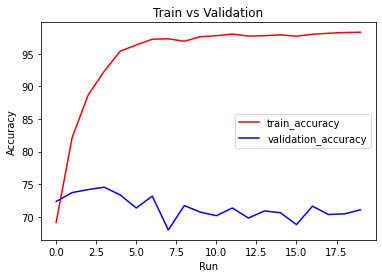

In [247]:
plt.plot(train_accuracy, color='red', label='train_accuracy')
plt.plot(validation_accuracy, color='blue', label='validation_accuracy')
plt.title('Train vs Validation')
plt.xlabel('Run')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [131]:
# Load the model with lowest validation loss
net.load_state_dict(torch.load('net_real_or_not.pt'))

<All keys matched successfully>

# Testing the Network

#### Preparing test dataset

In [150]:
def tokenize_tweet(tweet):
  test_tweet = normalize_text(tweet)
  test_words = test_tweet.split()

  #tokens
  test_ints = []
  test_ints.append([vocab_to_int[word] for word in test_words])

  return test_ints

In [151]:
# Testing tokenization
test_ints = tokenize_tweet(test_tweets[0])
print (test_ints)

[[30, 793, 2, 1519, 126, 94]]


In [153]:
seq_length = 100
features = pad_features(test_ints, seq_length)
print (features)

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0   30  793    2 1519
   126   94]]


In [154]:
# test conversion
feature_tensor = torch.from_numpy(features)
print (feature_tensor.size())

torch.Size([1, 100])


In [155]:
def predict(net, test_tweet, seq_length=100):
  net.eval()
  # tokenize tweet
  test_ints = tokenize_tweet(test_tweet)
  
  # pad tokenized seqquence
  seq_length = seq_length
  features = pad_features(test_ints, seq_length)

  feature_tensor = torch.from_numpy(features)

  batch_size = feature_tensor.size(0)

  # initialize hidden state
  h = net.init_hidden(batch_size)
  
  if train_on_gpu:
    feature_tensor = feature_tensor.cuda()
  
  output, h = net(feature_tensor, h)
  # print (output)
  # print (output.squeeze())
  # convert output probabilities to predicted class (0 or 1)
  pred = torch.round(output.squeeze())

  #print ('Prediction value, pre-rounding: {:.6f}'.format(output.item()))
  if pred.item() == 1:
    return 1
  else:
    return 0


In [156]:
test_text = test_tweets[0]
test_text

'just happened a terrible car crash'

In [158]:
predict(net, test_tweets[0], seq_length=100)

1

# Creating output in desired format

In [159]:
import pandas as pd

In [160]:
test_df = pd.DataFrame(data=None,columns=['id','target'])
test_df

,id,target


In [161]:
import numpy as np
dataa = []
for i in np.arange(10):
  data = []
  data.append(i)
  data.append('hello')
  dataa.append(data)

In [162]:
df = pd.DataFrame(data=dataa,columns=['id','target'])
df

,id,target
0,0,hello
1,1,hello
2,2,hello
3,3,hello
4,4,hello
5,5,hello
6,6,hello
7,7,hello
8,8,hello
9,9,hello


In [163]:
import sys

In [164]:
# Testing the model
test_data = []
total = len(test)
for i in range(len(test)):
  print(f"\r{i+1}/{total}", end='')
  data = []
  pred = predict(net, test['text'][i], seq_length=100)
  data.append(test['id'][i])
  data.append(pred)
  test_data.append(data)

3263/3263

In [165]:
test_df = pd.DataFrame(test_data, columns=['id','target'])
test_df.head()

,id,target
0,0,1
1,2,1
2,3,1
3,9,0
4,11,1


In [166]:
test_df.to_csv('/content/drive/My Drive/Artificial Intelligence/KaggleSubs/submission_realornot.csv',index=False)

In [167]:
len(test_df)

3263

In [16]:
import torch
def sig(x):
  return 1 / (1 + torch.exp(-x))

labels = torch.Tensor([1,1,0,0,1])
output = torch.Tensor([12,-2,-44,14,5])
output = activation(output)
print (output)
output = torch.round(output.squeeze())
print (output)

tensor([9.9999e-01, 1.1920e-01, 7.7811e-20, 1.0000e+00, 9.9331e-01])
tensor([1., 0., 0., 1., 1.])


In [21]:
print (output)
print (labels.float())
num_correct = (output == labels.float()).sum()
num_correct

tensor([1., 0., 0., 1., 1.])
tensor([1., 1., 0., 0., 1.])


tensor(3)